In [23]:
# Importing Pandas for Dataframe Manipulation as well as Matplotlib and Seaborn for visualization purposes.
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Importing the Linear Regression Object and the Train_Test_Split function fron Scikit-Learn's 'model_selection' package.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reading in our dataframe and printing out the first five rows!
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Dropping the Address Column, since it adds no predictive value to our regression problem.
df.drop("Address", axis=1, inplace=True)

# Visualizing the new dataframe.
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


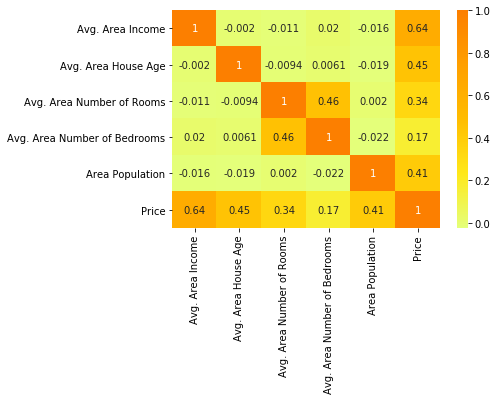

In [5]:
# Modeling the correlation amongst different variables with a Seaborn Heatmap.
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
plt.show()

In [6]:
# Creating two variables for our x and y data, respectively.
x_data = df.drop("Price", axis=1)
y_data = df["Price"]

In [7]:
# Printing out the contents of x data.
x_data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400


In [8]:
# Printing out the contents of y data.
y_data.head(3)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
Name: Price, dtype: float64

In [9]:
# Retrieving X and Y train-test sets by calling the 'train_test_split' function. (80-20 Split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [10]:
# Declaring and instantiating a new Linear Regression Object.
model = LinearRegression()

# Fitting our model to the x and y training sets.
model.fit(x_train, y_train)

# Making predictions with our trained model.
predictions = model.predict(x_test)

# Printing out the contents of the predictions list to the console.
print(predictions)

[1695275.533264    838516.14257626 1392261.77058145 1132939.41851784
 1695974.14107886 1406937.40373804  764509.66211845 1765399.35469958
 1399840.5149083  1067591.00767939 1305788.2880951  1125158.24809094
 1169809.23537967 1078607.13092773 1461672.43651187 1219549.1360413
 1315153.39341404  595343.65878625 1007788.670516   1201351.01141216
 1500120.12625692 1090105.70471257 1345533.95692348 1068702.0099824
 1095193.27245467 1615842.95834285 1898724.43760107  879428.13291539
 1295692.05314586  908870.20874186  865874.35962086 1195541.59974538
  882460.92979778 1020805.03009915 1067597.90439981  903313.90069655
 1450717.63017163 1173712.06801219 1357805.27772735 1520230.13900008
 1112927.99900418 1291932.46264204 1419128.86056839  757913.81538203
 1359635.95158694 1269836.8049202   462113.56155135 1694177.79179481
 1583749.95971952  632836.56993395 1493959.27575593 1052083.7904548
  799680.56129665  839315.0618029   971308.27307443 1372704.46067729
  773400.81008694 1489779.63579458  6

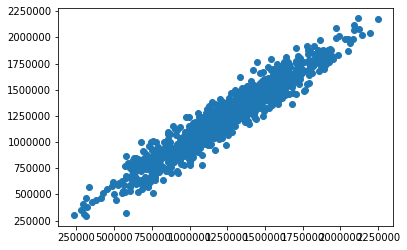

In [14]:
# Modeling the alignment of our model's predictions with the correct y-values.
plt.scatter(y_test, predictions)
plt.show()

In [46]:
# Printing out all coefficients for our regression model.
print("Coefficient 1: " + str(model.coef_[0]))
print("Coefficient 2: " + str(model.coef_[1]))
print("Coefficient 3: " + str(model.coef_[2]))
print("Coefficient 4: " + str(model.coef_[3]))
print("Coefficient 5: " + str(model.coef_[4]))

Coefficient 1: 21.5847860804739
Coefficient 2: 165540.50015965354
Coefficient 3: 120728.33645297837
Coefficient 4: 1632.9460326009157
Coefficient 5: 15.25862890234992


In [49]:
# Accessing the y-intercept of our regression model.
print("Y-Intercept: " + str(model.intercept_))

Y-Intercept: -2639992.895842066


In [53]:
# Gaging our model's accuracy on unseen data.
model.score(x_test, y_test)

0.9122684022627111

In [54]:
# Viewing the Mean Squared Error for our regression model.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

81483.74963372643